<a href="https://colab.research.google.com/github/nurgulbagit/Data-Science-projects/blob/main/ds03_More_Test_Train_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training vs Testing Error

Overfitting, and fitting the noise vs fitting the signal




In [ ]:
# import important python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
%matplotlib inline

In [ ]:
# sets the seed for NumPy's random number generator to a specific value, in this case, 42
# running code always gets same random numbers -- useful for debugging and verifying results.
np.random.seed(42)

### Data Creation

1. 95% of points with $X_1 > 5$ have $y = 1$
2. 5% of points with $X_1 > 5$ have $y = 0$
3. 95% of points with $X_1 < 5$ have $y = 0$
4. 5% of points with $X_1 < 5$ have $y = 1$

**Signal vs Noise**:

In [ ]:
# data generation mechanism

 # return N labeled points
def gen_labeled_points(N,p):
  # First we generate uniformly distributed points
  rng = default_rng(12) # another way to set the random seed
  X = rng.uniform(low=0.0, high=10.0, size=[N,2])
  y = np.ones(N) # by default set all labels to 1
  # Now we label them
  for i in range(N):
    # generate a p, 1-p coin
    c = 1
    if (rng.uniform(0,1) > 1-p): c = -1.
    if (X[i,0] > 5): y[i] = y[i]*c
    if (X[i,0] < 5): y[i] = -1*y[i]*c
  y = 0.5*(y+1) # make y 0's and 1's
  y = y.astype(int) # return integers, not floats
  return X,y

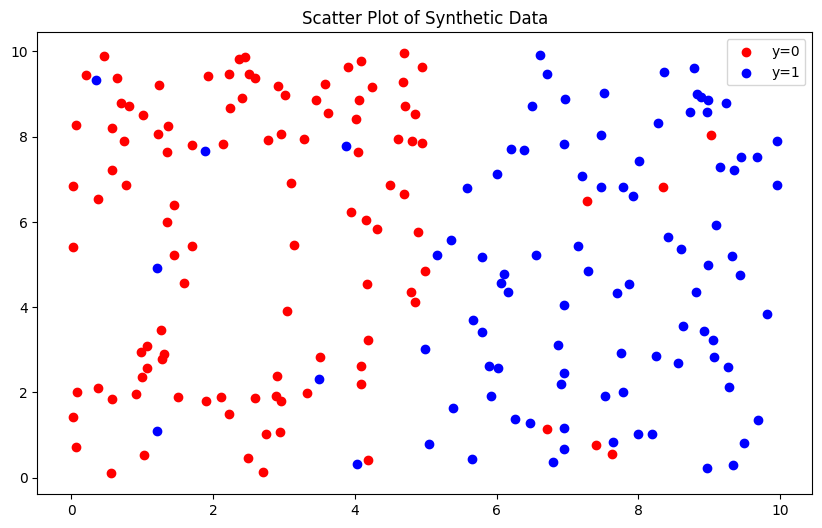

In [ ]:
# N points, probability of color flip = p
N = 200
p = 0.05
X,y = gen_labeled_points(N,p)

# Create a scatter plot
plt.figure(figsize=(10, 6))
for i in range(len(X)):
    if y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', label='y=1' if 'y=1' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', label='y=0' if 'y=0' not in plt.gca().get_legend_handles_labels()[1] else "")

# Adding labels and title
plt.title('Scatter Plot of Synthetic Data')
plt.legend()
plt.show()

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split #function that splits the dataset into training and testing subsets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.75, shuffle=True, random_state=42)

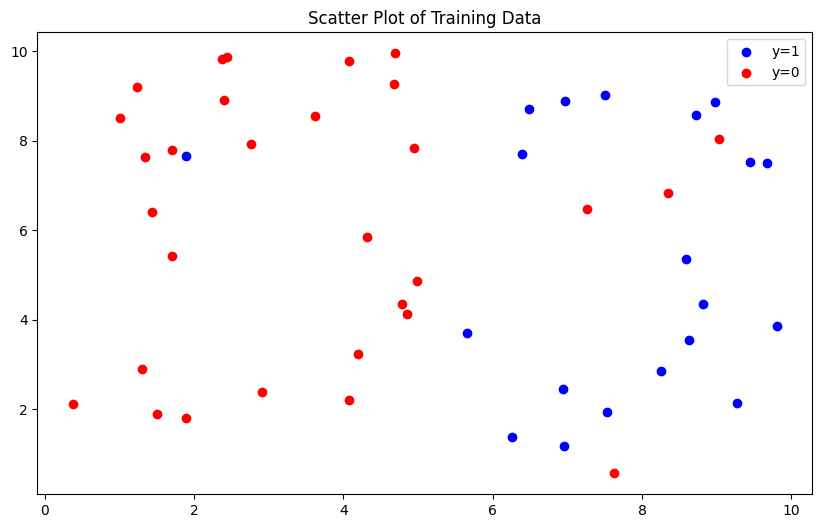

In [ ]:
# training data

# Create a scatter plot
plt.figure(figsize=(10, 6))
for i in range(len(X_train)):
    if y_train[i] == 1:
        plt.scatter(X_train[i, 0], X_train[i, 1], color='blue', label='y=1' if 'y=1' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(X_train[i, 0], X_train[i, 1], color='red', label='y=0' if 'y=0' not in plt.gca().get_legend_handles_labels()[1] else "")

# Adding labels and title
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.show()

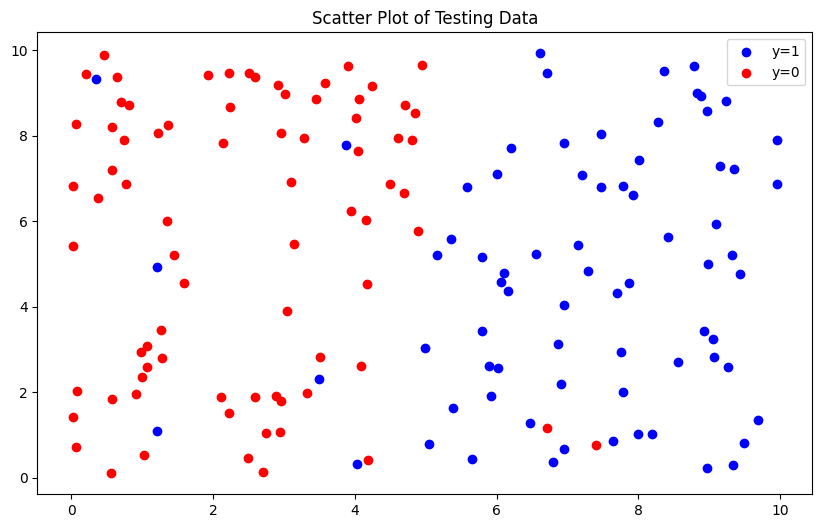

In [ ]:
# testing data

# Create a scatter plot
plt.figure(figsize=(10, 6))
for i in range(len(X_test)):
    if y_test[i] == 1:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='blue', label='y=1' if 'y=1' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='red', label='y=0' if 'y=0' not in plt.gca().get_legend_handles_labels()[1] else "")

# Adding labels and title
plt.title('Scatter Plot of Testing Data')
plt.legend()
plt.show()

## Deep tree, shallow tree

In [ ]:
dt_deep = tree.DecisionTreeClassifier(max_depth=6)
dt_deep = dt_deep.fit(X_train, y_train)
train_score_deep = dt_deep.score(X_train,y_train)
print('The training accuracy for the deep tree is:', train_score_deep)
dt_shallow = tree.DecisionTreeClassifier(max_depth=1)
dt_shallow = dt_shallow.fit(X_train, y_train)
train_score_shallow = dt_shallow.score(X_train,y_train)
print('The training accuracy for the shallow tree is:', train_score_shallow)

The training accuracy for the deep tree is: 1.0
The training accuracy for the shallow tree is: 0.9


## Decision Regions?

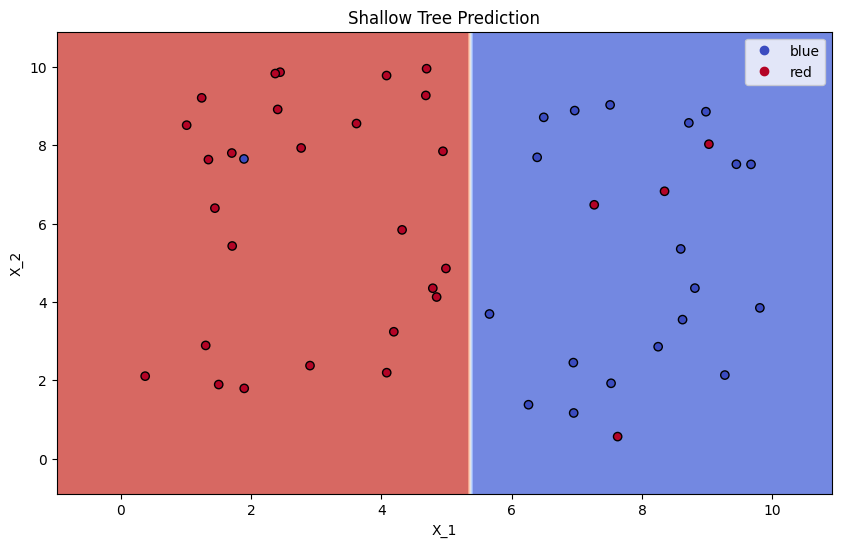

In [ ]:
# Define the grid range based on your data
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predict the outcome on the meshgrid
Z = dt_shallow.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, -Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=-y_train, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Shallow Tree Prediction')
plt.legend(handles=scatter.legend_elements()[0], labels=['blue', 'red'])
plt.show()


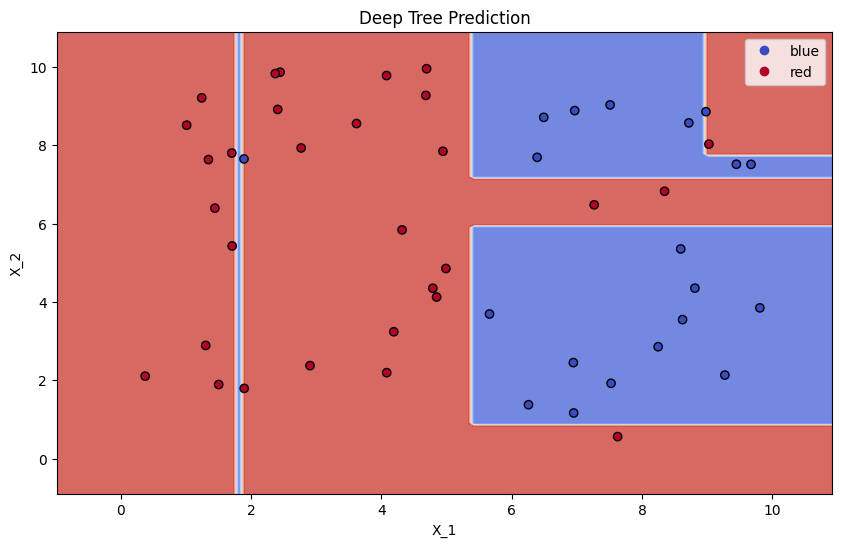

In [ ]:
# Define the grid range based on your data
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predict the outcome on the meshgrid
Z = dt_deep.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, -Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=-y_train, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Deep Tree Prediction')
plt.legend(handles=scatter.legend_elements()[0], labels=['blue', 'red'])
plt.show()


## Accuracy on Testing Data

In [ ]:
train_score_deep = dt_deep.score(X_test,y_test)
print('The testing accuracy for the deep tree is:', train_score_deep)
train_score_shallow = dt_shallow.score(X_test,y_test)
print('The testing accuracy for the shallow tree is:', train_score_shallow)

The testing accuracy for the deep tree is: 0.82
The testing accuracy for the shallow tree is: 0.9266666666666666


# Let's look at testing data

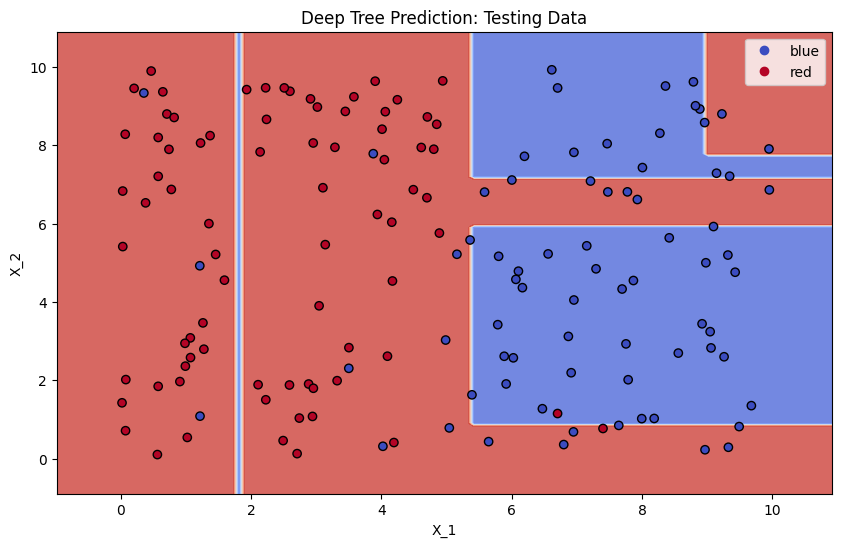

In [ ]:
# Define the grid range based on your data
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predict the outcome on the meshgrid
Z = dt_deep.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, -Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=-y_test, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Deep Tree Prediction: Testing Data')
plt.legend(handles=scatter.legend_elements()[0], labels=['blue', 'red'])
plt.show()


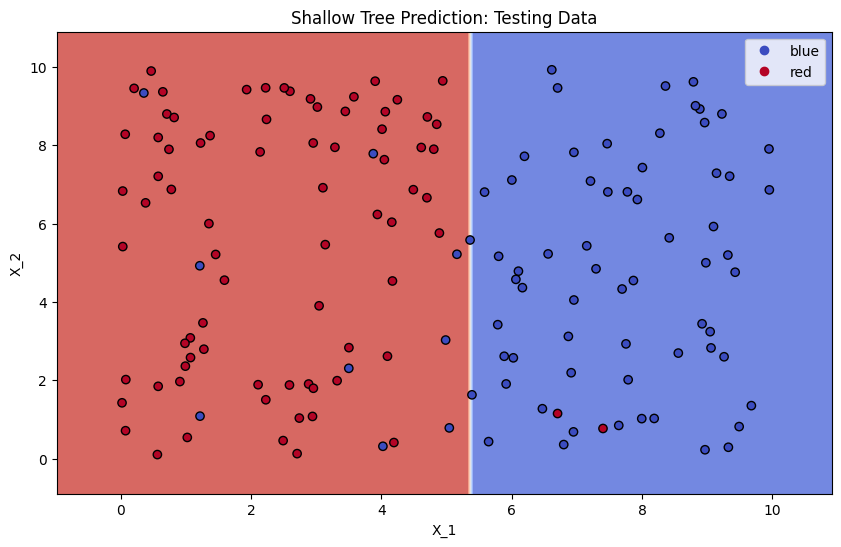

In [ ]:
# Define the grid range based on your data
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predict the outcome on the meshgrid
Z = dt_shallow.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, -Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=-y_test, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Shallow Tree Prediction: Testing Data')
plt.legend(handles=scatter.legend_elements()[0], labels=['blue', 'red'])
plt.show()


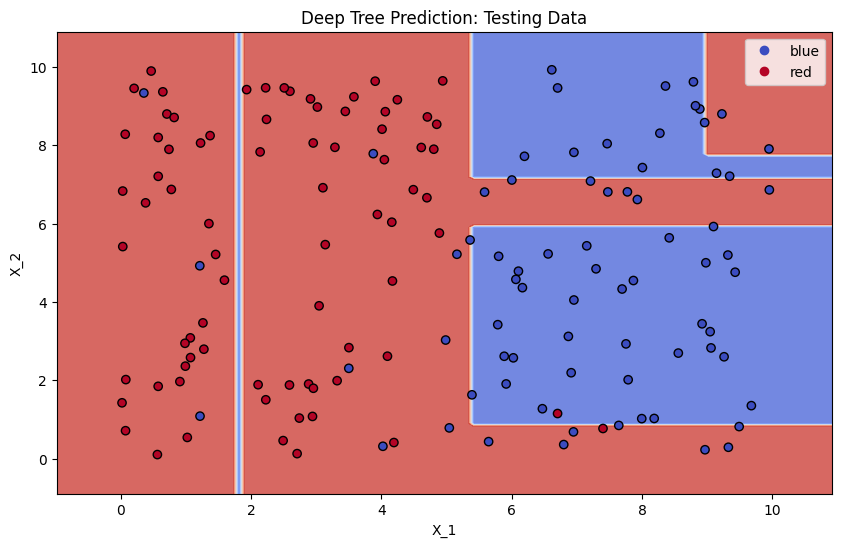

In [ ]:
# Define the grid range based on your data
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predict the outcome on the meshgrid
Z = dt_deep.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, -Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=-y_test, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Deep Tree Prediction: Testing Data')
plt.legend(handles=scatter.legend_elements()[0], labels=['blue', 'red'])
plt.show()
